# 2.0.0 Graph

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.manifold import TSNE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

from utils.paths2 import direcciones_cursos

G_raw, G_processed, G_interim, G_external, G_models, G_reports, G_reports_figures = direcciones_cursos('luxemburgo')

In [4]:
df = pd.read_parquet(G_processed/'df.parquet.gzip')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,3,4,2,103,3,6,0,4,0
1,1,4,4,2,98,3,6,0,4,0
2,1,2,4,2,15,3,6,0,4,1
3,1,2,4,2,15,3,6,0,4,0
4,1,4,4,2,68,3,6,0,4,0


In [10]:
# Create a TSNE instance: model
model = TSNE(n_components=3, learning_rate='auto')

In [11]:
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df)

In [12]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

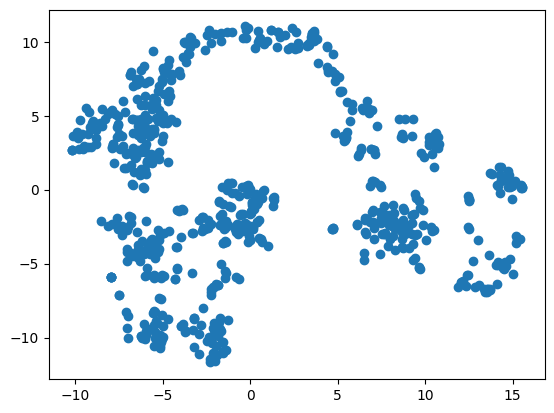

In [13]:
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys) #, c=variety_numbers
plt.show()

In [41]:
fig = px.scatter(x=xs, y=ys,
                 labels = {'x': '', 'y': '', 'z':''},
                 )
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.write_html(G_reports_figures/'{}.html'.format('main'))
fig.show()

In [9]:
print('ok_')

ok_
